In [5]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] =  1.6

In [114]:
def calc_mean_diff(rr_df,
              types_1=['original'],
              types_2=['degree_2', 'degree_3', 'degree_4', 'degree_4_split', 'degree_8', 'degree_8_split']):

    rr_described = rr_df.describe()
    types_1_mean = np.mean(rr_described.loc['mean',types_1].values)
    types_2_mean = np.mean(rr_described.loc['mean',types_2].values)
    return types_1_mean - types_2_mean


print(calc_mean_diff(rr_df))
print(calc_mean_diff(rr_df, types_2=['degree_2']))

0.3724182938920923
0.2989858201428496


In [384]:
EVAL_DIR_MRR = '/run/media/root/Windows/Users/agnes/Downloads/data/msmarco/eval/eval_model_regression'

In [385]:
eval_df = pd.DataFrame(columns=['name', 'mean diff. relevant: originals vs. degree-k', 
                                'mean abs. diff. relevant: originals vs. degree-k', 
                                'avg. diff. relevant and irrelevant originals' ,
                                'weigh', 'st'])

for fn in os.listdir(EVAL_DIR_MRR):
    if not fn.endswith('.csv'):
        continue
    stats_df =  pd.read_csv(os.path.join(EVAL_DIR_MRR, fn))    
    
    mean_diff = calc_mean_diff(stats_df)
    
    mean_score_diff = calc_mean_diff(stats_df,types_1=['original', 
                                                       #'degree_2', 'degree_3', 'degree_4', 
                                                       #'degree_4_split', 
                                                       #'degree_8', 'degree_8_split'
                                                      ],
                                     types_2=['original_irrelevant'])
    
    weigh = 'weigh' in fn
    if weigh:
        continue
    st = -1    
    if 'lcs' in fn:
        m = re.match('([a-zA-Z\_]+)([\d\.]+)([a-zA-Z\_]*)(\.csv)', fn)
        st = float(m.group(2))
    eval_df = eval_df.append({'name': fn[:-4], 
                              'mean diff. relevant: originals vs. degree-k': mean_diff, 
                              'mean abs. diff. relevant: originals vs. degree-k': abs(mean_diff), 
                              'avg. diff. relevant and irrelevant originals': mean_score_diff,
                              'weigh': weigh, 'st': st},
                            ignore_index=True)


In [386]:
#eval_df.sort_values(by='mean_diff_abs')        

In [387]:
eval_df[eval_df['avg. diff. relevant and irrelevant originals'] > 0].\
         sort_values(by='mean abs. diff. relevant: originals vs. degree-k')        

,name,mean diff. relevant: originals vs. degree-k,mean abs. diff. relevant: originals vs. degree-k,avg. diff. relevant and irrelevant originals,weigh,st
10,sbert_lcs_st_0.3,0.045878,0.045878,0.150788,False,0.3
11,sbert_lcs_st_0.4,0.058635,0.058635,0.163903,False,0.4
9,sbert_lcs_st_0.2,0.074415,0.074415,0.173472,False,0.2
12,sbert_lcs_st_0.5,0.092237,0.092237,0.184207,False,0.5
8,sbert_lcs_st_0.1,0.116737,0.116737,0.208010,False,0.1
0,bm25,-0.118316,0.118316,0.003215,False,-1
2,bm25_nostemming,-0.118823,0.118823,0.002622,False,-1
1,bm25_noidf,-0.119578,0.119578,0.006076,False,-1
3,bm25_nostemming_noidf,-0.120213,0.120213,0.005213,False,-1
7,sbert_lcs_st_0.05,0.135057,0.135057,0.222850,False,0.05


In [393]:
eval_df['to_maximize'] =  eval_df['avg. diff. relevant and irrelevant originals'] - \
                          eval_df['mean abs. diff. relevant: originals vs. degree-k']

In [394]:
eval_df_melted = pd.melt(eval_df, id_vars=['name'], value_vars=['avg. diff. relevant and irrelevant originals', 
                                                               'mean abs. diff. relevant: originals vs. degree-k',
                                                               'to_maximize'])

eval_df_melted

,name,variable,value
0,bm25,avg. diff. relevant and irrelevant originals,0.003215
1,bm25_noidf,avg. diff. relevant and irrelevant originals,0.006076
2,bm25_nostemming,avg. diff. relevant and irrelevant originals,0.002622
3,bm25_nostemming_noidf,avg. diff. relevant and irrelevant originals,0.005213
4,d2v,avg. diff. relevant and irrelevant originals,0.061650
5,sbert_avg,avg. diff. relevant and irrelevant originals,0.269684
6,sbert_complex,avg. diff. relevant and irrelevant originals,0.395219
7,sbert_lcs_st_0.05,avg. diff. relevant and irrelevant originals,0.222850
8,sbert_lcs_st_0.1,avg. diff. relevant and irrelevant originals,0.208010
9,sbert_lcs_st_0.2,avg. diff. relevant and irrelevant originals,0.173472


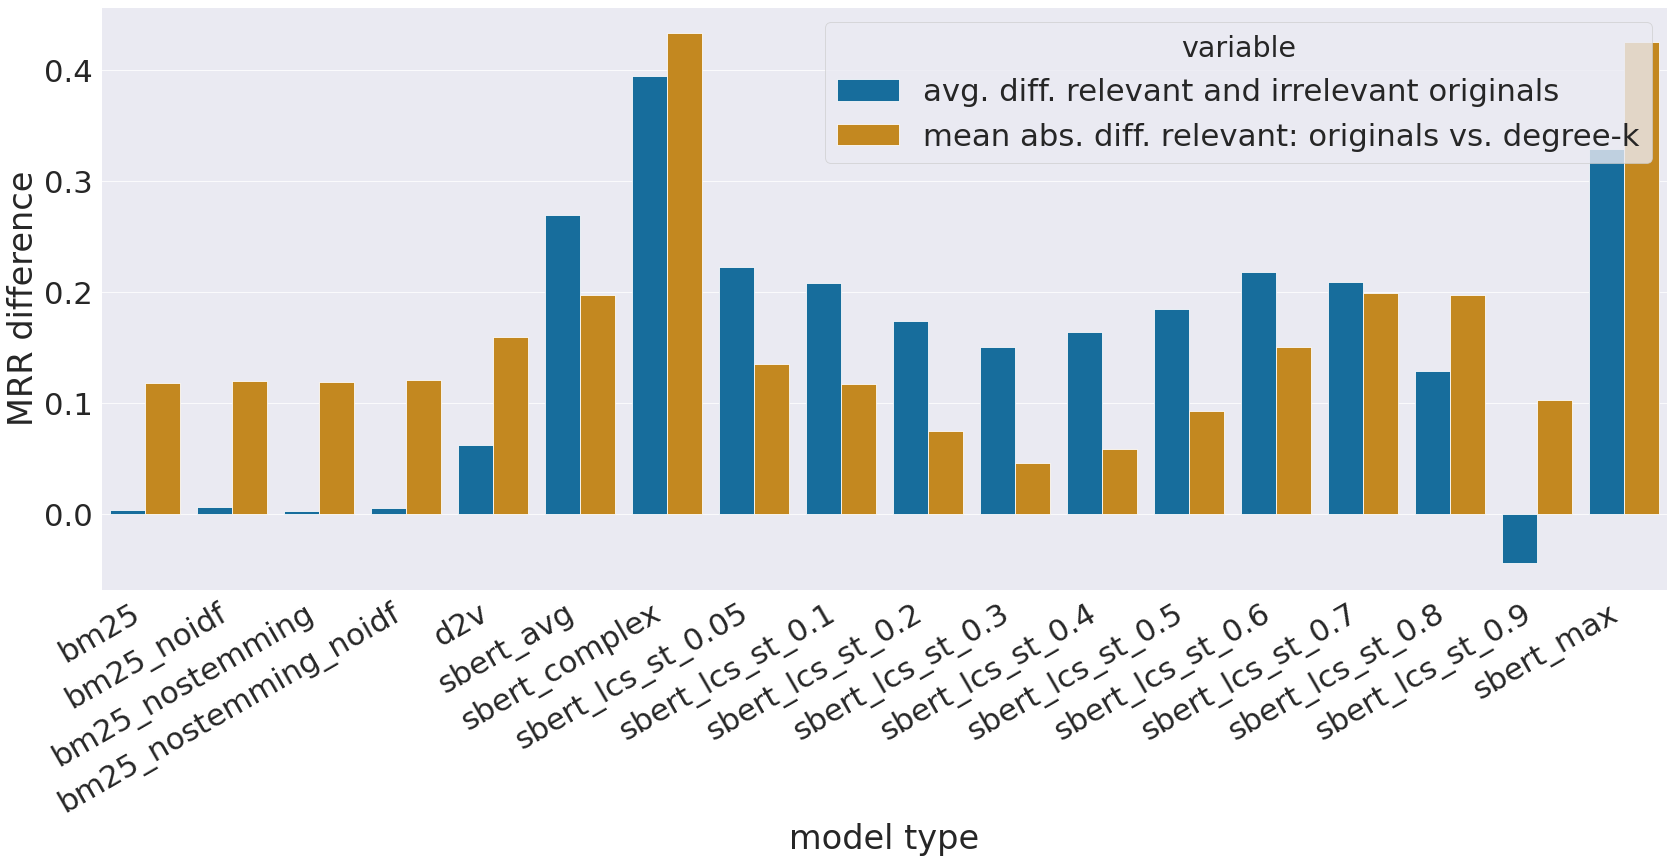

In [395]:
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
sns.set(font_scale=5)
sns.set(palette="colorblind")
sns.set_context("paper", font_scale=3.5, rc = {'lines.linewidth': 1.5, 'lines.markersize': 3.5})

plt.figure(figsize=(25,10))
ax = sns.barplot(data=eval_df_melted, y='value', x='name', hue='variable',
                hue_order=['avg. diff. relevant and irrelevant originals', 
                           'mean abs. diff. relevant: originals vs. degree-k'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
ax.set_ylabel('MRR difference')
ax.set_xlabel('model type')
print()

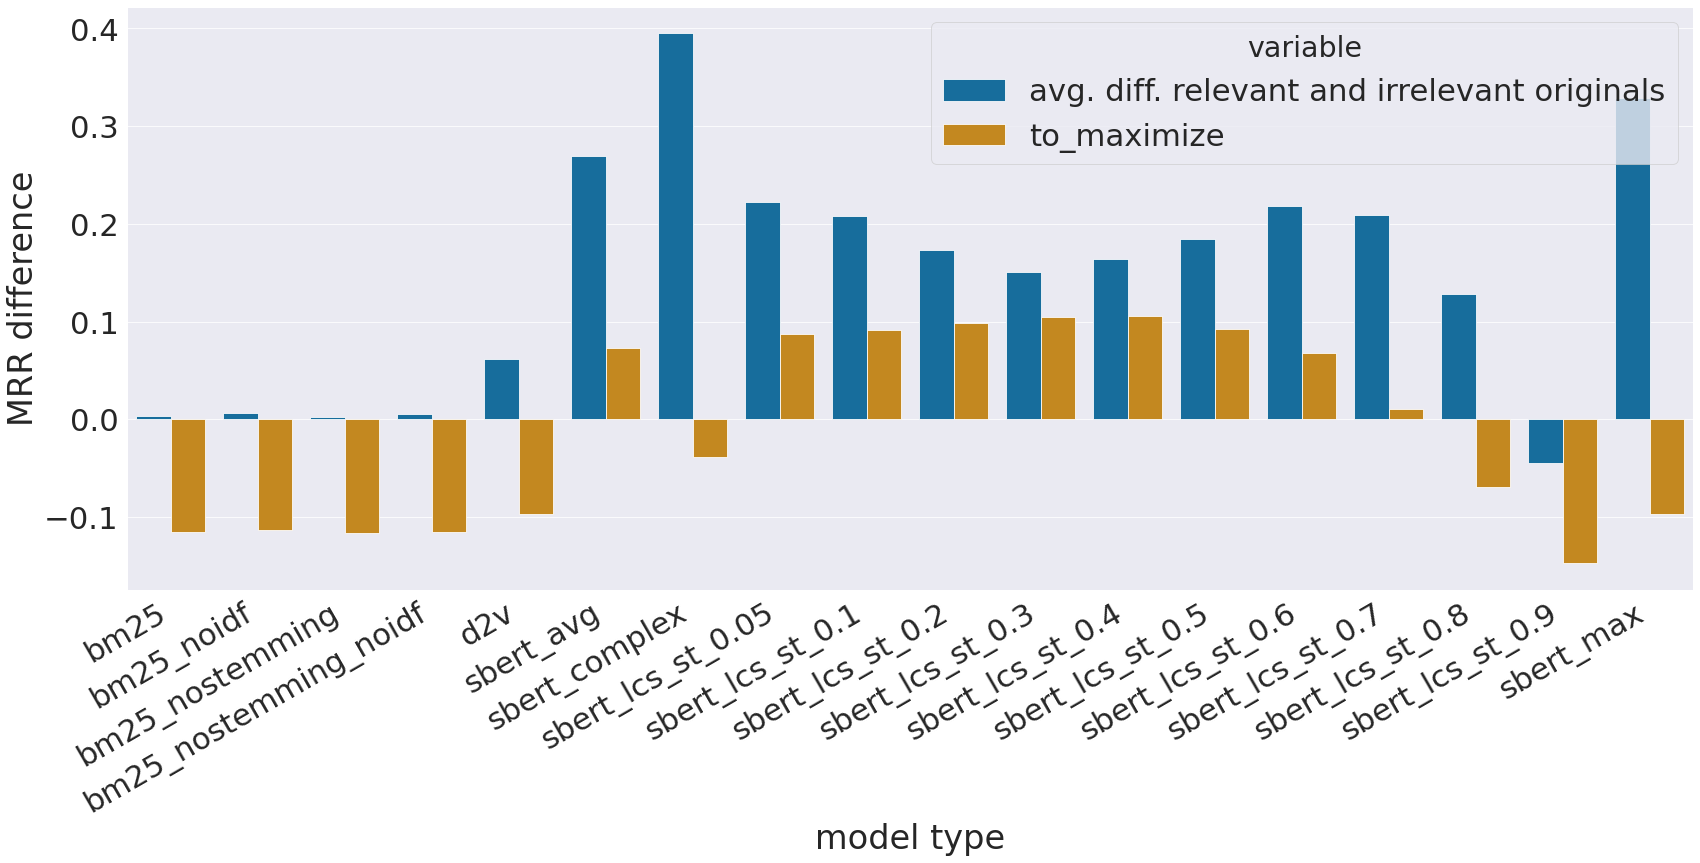

In [396]:
plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")
sns.set(font_scale=5)
sns.set(palette="colorblind")
sns.set_context("paper", font_scale=3.5, rc = {'lines.linewidth': 1.5, 'lines.markersize': 3.5})

plt.figure(figsize=(25,10))
ax = sns.barplot(data=eval_df_melted, y='value', x='name', hue='variable',
                hue_order=['avg. diff. relevant and irrelevant originals', 'to_maximize'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
ax.set_ylabel('MRR difference')
ax.set_xlabel('model type')
print()

In [449]:

model_file_list = ['sbert_avg.csv', 'd2v.csv', 'sbert_lcs_st_0.4.csv']

#model_file_list = ['sbert_lcs_st_0.05.csv', 'sbert_lcs_st_0.2.csv', 
#                   'sbert_lcs_st_0.4.csv', 'sbert_lcs_st_0.6.csv' ]


dfs = [] 
for fn in model_file_list:

    df =pd.read_csv(os.path.join(EVAL_DIR_MRR, fn))
    df['model'] = fn[:-4]
    dfs.append(df)
   
rr_df = pd.concat(dfs, axis=0)

In [450]:
rr_df.describe()
print(calc_mean_diff(rr_df))
print(calc_mean_diff(rr_df, types_2=['degree_2']))

0.13828891626027634
0.1253996444389652


In [451]:
def rename_types_dict(name):
    if name == 'original':
        return 'rel_original'
    elif name == 'original_irrelevant':
        return 'irrel_original'    
    m = re.match("(degree_)([\d]+)", name)
    if not m:
        raise Exception("Unknown column name '" + name + "'")
    number = m.group(2)
    if name.endswith('split'):
        return 'rel_degree_' + str(number) + '_split'
    return 'rel_degree_' + str(number)

In [452]:
def make_mrr_boxplots(data, cols, id_vars=['qid'], ylabel='MRR', xlabel='document type', title='',
                      figsize=(8,8)):
    
    fig = plt.figure(figsize=figsize)
    
    data_melted = pd.melt(data, id_vars=['qid', 'model'], value_vars=cols)
    
    sns.set_context("paper", font_scale=2, rc = {'lines.linewidth': 1.5, 'lines.markersize': 3.5})

    
    ax = sns.boxplot(x="variable", y="value", data=data_melted, palette="colorblind", showmeans=True,
                     hue='model',
                    meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.xticks(plt.xticks()[0], [rename_types_dict(x) for x in cols])


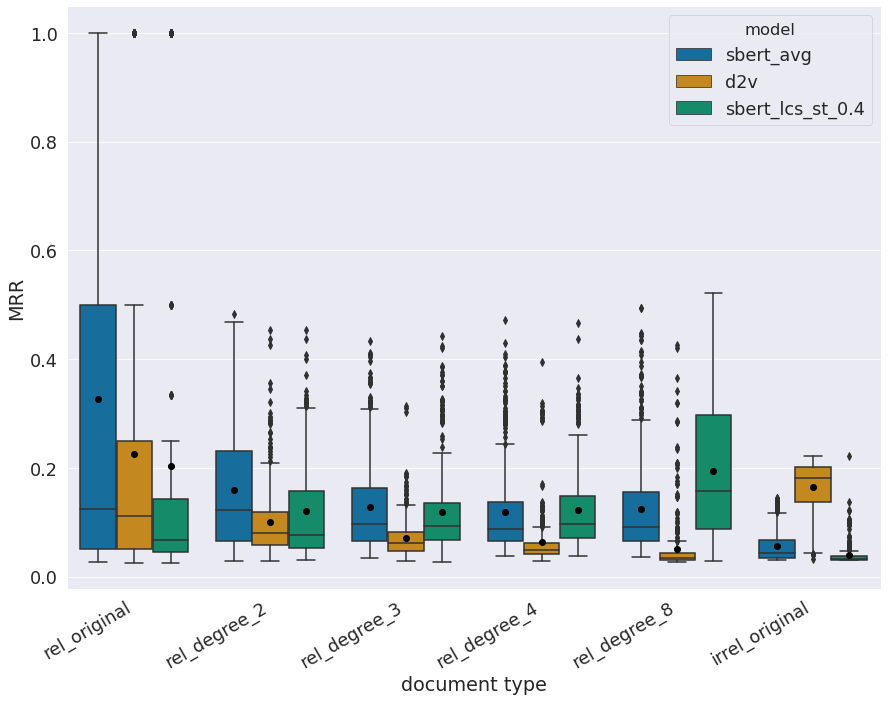

In [454]:
cols = ['original'] + \
       [x for x in rr_df.columns if x.startswith('degree_') and not x.endswith('split')] + \
       ['original_irrelevant']
make_mrr_boxplots(rr_df, cols, figsize=(13,10))

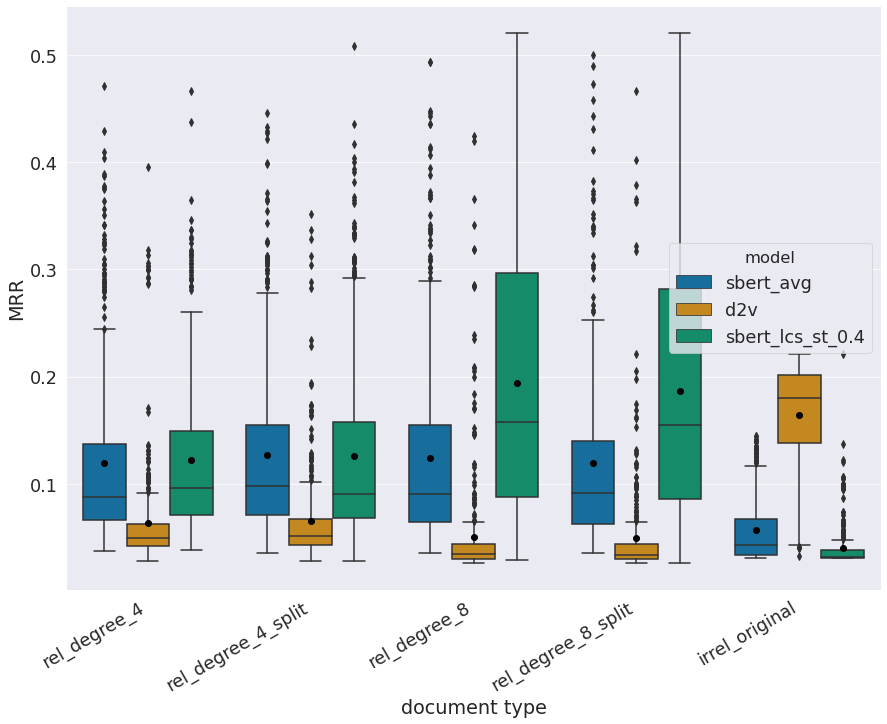

In [456]:
cols =  \
       ['degree_4', 'degree_4_split'] +\
       ['degree_8', 'degree_8_split'] + \
       ['original_irrelevant']


make_mrr_boxplots(rr_df, cols, figsize=(13,10))